# Physics 404/604

## Computational Physics 

This method supposedly has a higher order of accuracy than all previous methods.  Do you get more accurate results? - DOESN'T SEEM LIKE IT

## Homework:
### Burger's equation

In real-world applications, the advection velocity $v$ is usually variable.  For example,

\begin{equation}
\frac{\partial U}{\partial t}+U\frac{\partial U}{\partial x}=0.
\end{equation}

This is called Burger's equation, where the advection velocity depends on the property being advected, i.e., $U$.

1)Let's try the upwind method to solve this equation with an initial Gaussian profile. (U before $\frac{\partial U}{\partial x}$ is velocity at n and j)

2)Please experiment with different grid sizes.

3)Now the solution develops a non-symmetric profile over time.  Can you explain why?

# Part 1 - Upwind Method for Burger's equation

In [24]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as tck
import matplotlib.pylab as p
from mpl_toolkits.mplot3d import Axes3D 

import time
import math

In [25]:
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['axes.titlesize'] = 32
mpl.rcParams['axes.labelsize'] = 30
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 10
mpl.rcParams['xtick.labelsize'] = 27
mpl.rcParams['ytick.labelsize'] = 27

mpl.rcParams['xtick.major.size'] = 18 #+2 from previous
mpl.rcParams['xtick.minor.size'] = 12 #+4 from previous
mpl.rcParams['ytick.major.size'] = 18 #+4 from previous
mpl.rcParams['ytick.minor.size'] = 12 #+4 from previous

mpl.rcParams['axes.grid.which'] = 'major'
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.alpha'] = 0.5
mpl.rcParams['axes.grid.which'] = 'minor'
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.alpha'] = 0.5

mpl.rcParams['legend.fontsize'] = 22

mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

np.set_printoptions(precision=3)

In [37]:
"""
This is the Upwind method for solving inviscous Burger's equation.
The initial profile is Gaussian and preprovided inside the function.
"""

##### PART 1 - UPWIND METHOD ######
##### DEFINITION #####

# NOTE: coef needs to be < 1.0
# coef controls the size of dt
# Nx is the number of grid points (including boundary)

def Burger(coef = 0.8, Nx = 101):
    
    # Model Parameters
    xmin = -10.0   # left boundary
    xmax = +10.0   # right boundary
    tend = 10.0    # end time
    dtout = 1.0   # time interval for outputs
    
    # Set up the grid.
    x = np.linspace(xmin, xmax, Nx)
    dx = (xmax - xmin) / (Nx - 1)
    dt = coef * dx
    U = np.zeros(Nx,)
    
    # Give the initial profile.
    t = 0.0
    U = 0.2 + 0.8 * np.exp(-0.5 * x**2)
    
    
    # Prepare for 3D outputs.
    tp = [t]
    Up = np.copy(U)
    
    # Initiate the plot.
    fig = plt.figure(figsize=(16,10))
    ax = fig.gca()
    ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
    ax.set_xlabel(r"Position $x$")
    ax.set_ylabel(r"$U(t,x)$")
    ax.minorticks_on()
    ax.set_title(r'Burger profile evolution with $dt = ({:.2E})*dx$ and $Nx = {:d}$'.format(coef,Nx))
    
    # Begin the simulation.
    tout = t + dtout
    while t < tend:
        # Backup the previous time step.
        Uold = np.copy(U)
    
        # Find the state at the next time step.
        for ix in range(1, Nx - 1):
            # Instead of vel we have Uold now
            if Uold[ix] > 0:
                U[ix] = Uold[ix] - Uold[ix]*dt*((Uold[ix] - Uold[ix-1])/dx)
                
            else:
                U[ix] = Uold[ix] - Uold[ix]*dt*((Uold[ix+1] - Uold[ix])/dx)
                
        t += dt
    
        # Save the data after every dtout.
        if t >= tout:
            plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
            tp.append(t)
            Up = np.vstack((Up, U))
            print("t = ", t)
            tout += dtout
    
    ax.legend()
    
    # Create 3D-view of the solution.
    t, x = np.meshgrid(tp, x)
    fig3D = plt.figure(figsize=(16,10))
    ax3D = Axes3D(fig3D)
    ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
    ax3D.set_xlabel("Time $t$")
    ax3D.set_ylabel("Position $x$")
    ax3D.set_zlabel(r"$U(t,x)$")
    
    print("Done.")
    plt.show()

# Part 2 - Different gridsizes

Here I was thinking of doing everything as subplots, but differences between each version are quite minute unless one goes to the extreme orders of manitude differences. Rather I made a title and open the graph in a different tab to compare between them visually.

In general, smaller $dt$'s and $dx$'s appear to be favored for accuracy, but cost more resources. It seems that having a combination of one 'fine' and one 'coarse' step components still gives a very good representation of what's happening. It's the combination of two 'coarse' steps that is devasting (see last pair of graphs).

t =  1.12
t =  2.080000000000001
t =  3.040000000000002
t =  4.000000000000003
t =  5.120000000000004
t =  6.0800000000000045
t =  7.040000000000005
t =  8.000000000000005
t =  9.120000000000006
t =  10.080000000000007
Done.


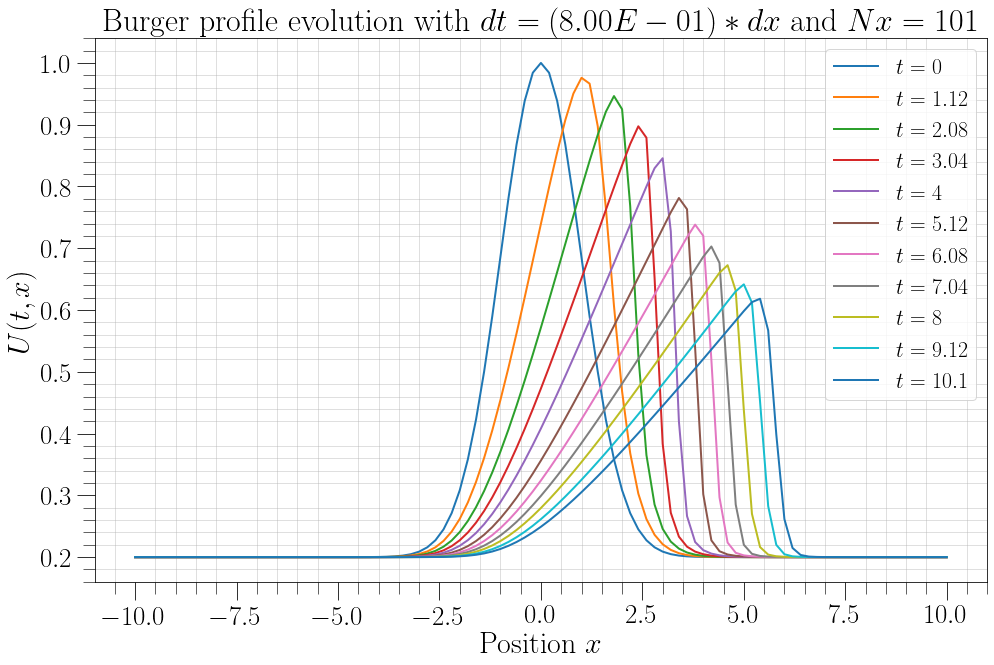

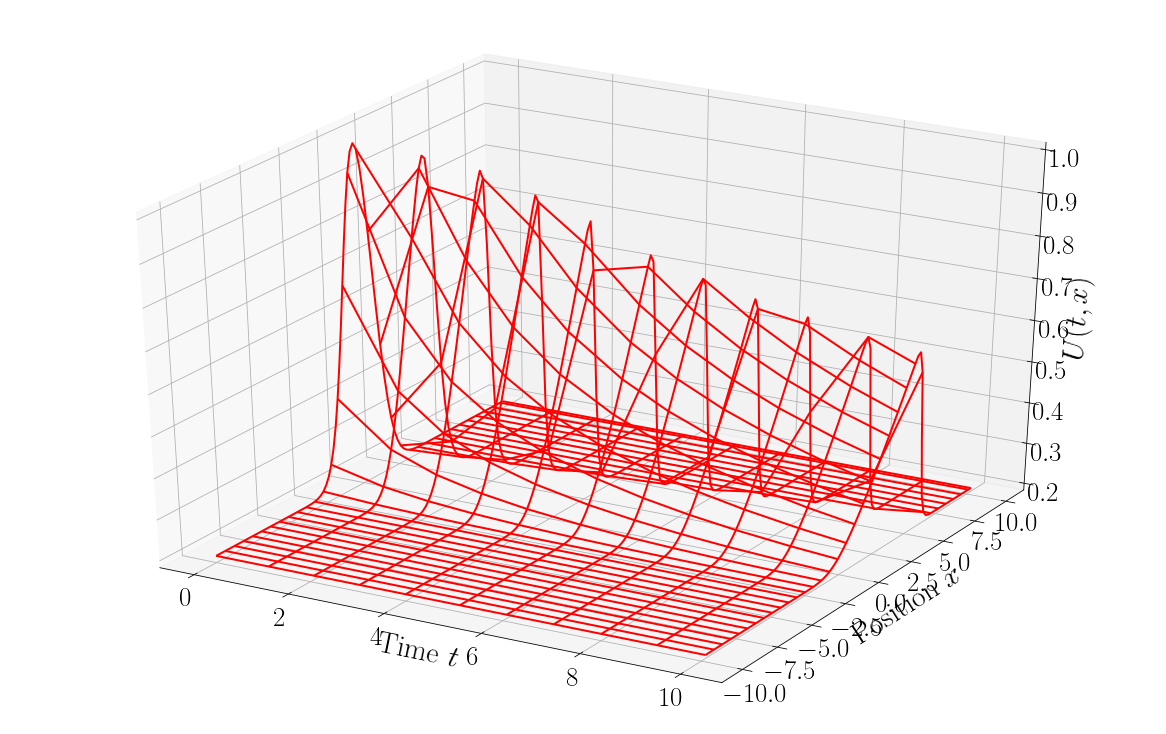

In [38]:
Burger(0.8,101)

t =  1.0080000000000007
t =  2.0000000000000013
t =  3.0080000000000022
t =  4.000000000000003
t =  5.008000000000004
t =  6.000000000000004
t =  7.008000000000005
t =  8.000000000000005
t =  9.008000000000006
t =  10.000000000000007
Done.


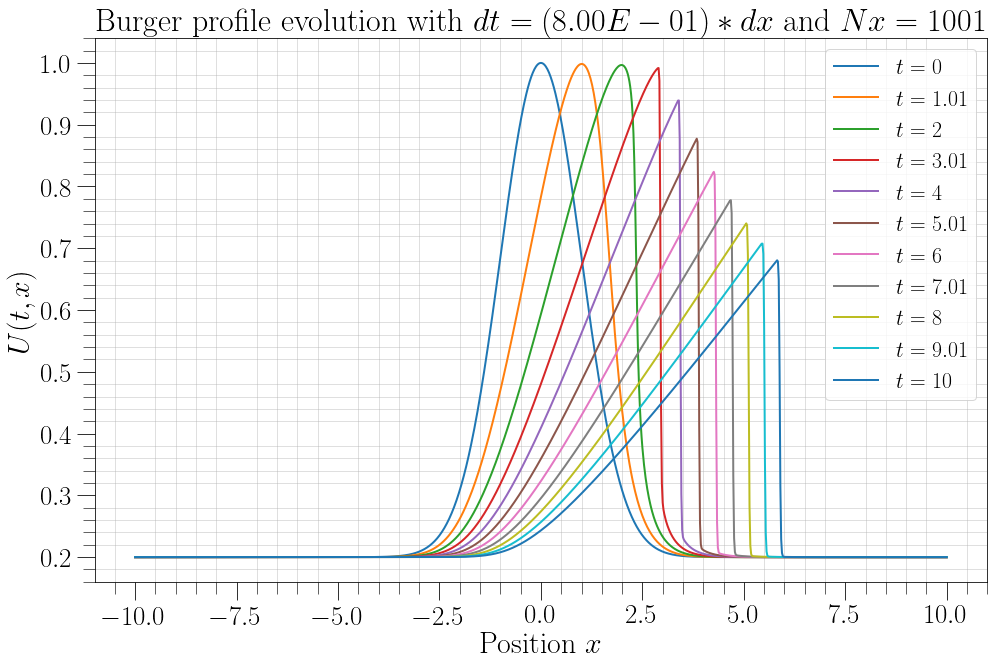

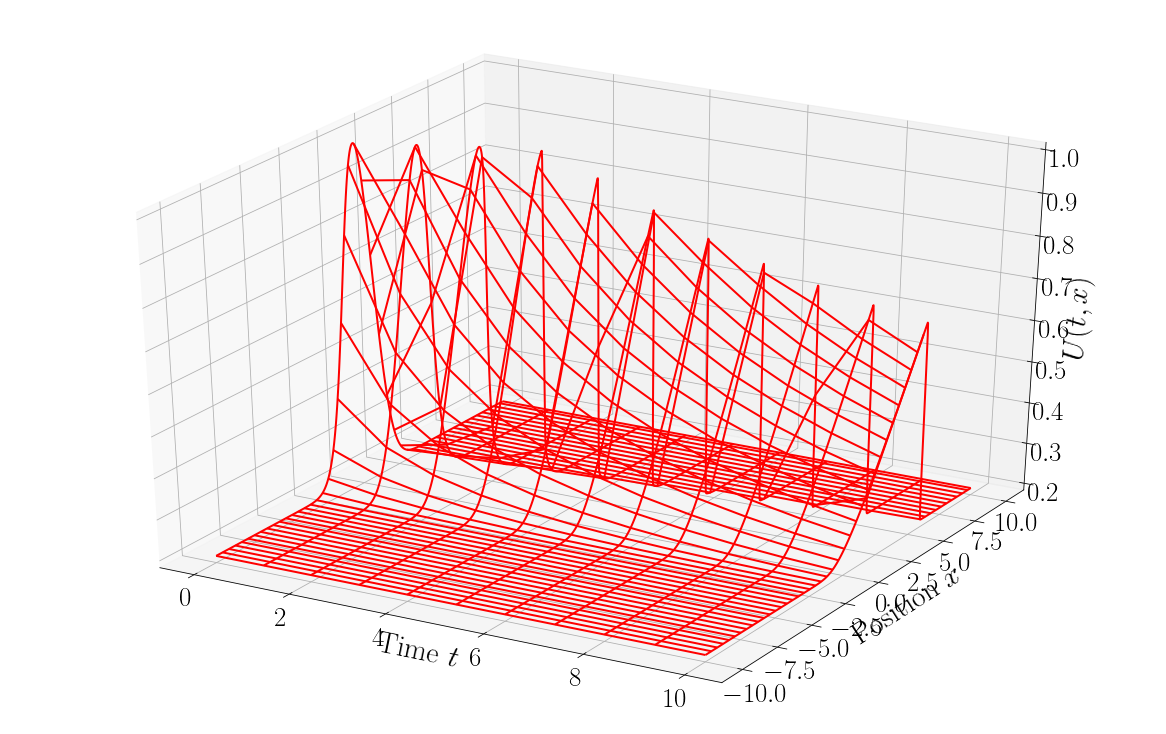

In [39]:
Burger(0.8,1001)

t =  1.0000000000000007
t =  2.0000000000000013
t =  3.001999999999891
t =  4.001999999999781
t =  5.001999999999671
t =  6.001999999999561
t =  7.001999999999451
t =  8.001999999999342
t =  9.001999999999676
t =  10.000000000000009
Done.


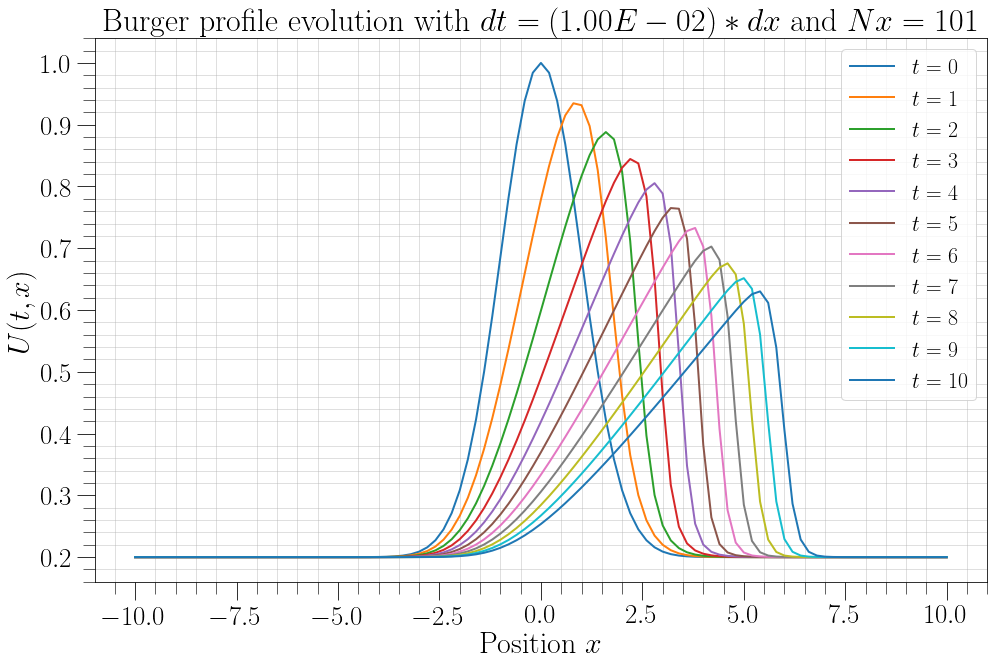

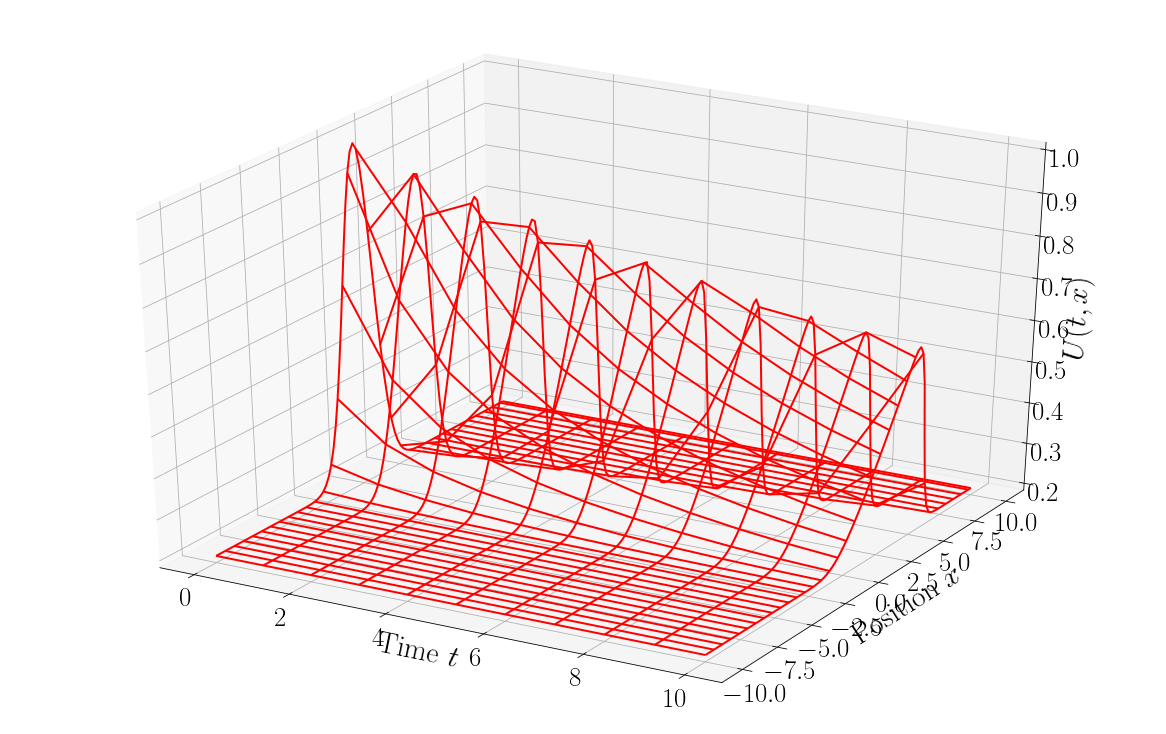

In [40]:
Burger(0.01,101)

t =  1.0001999999999225
t =  2.0001999999998126
t =  3.0001999999997024
t =  4.000199999999593
t =  5.000000000001703
t =  6.000000000003813
t =  7.000000000005923
t =  8.000000000008033
t =  9.000000000005702
t =  10.000000000003372
Done.


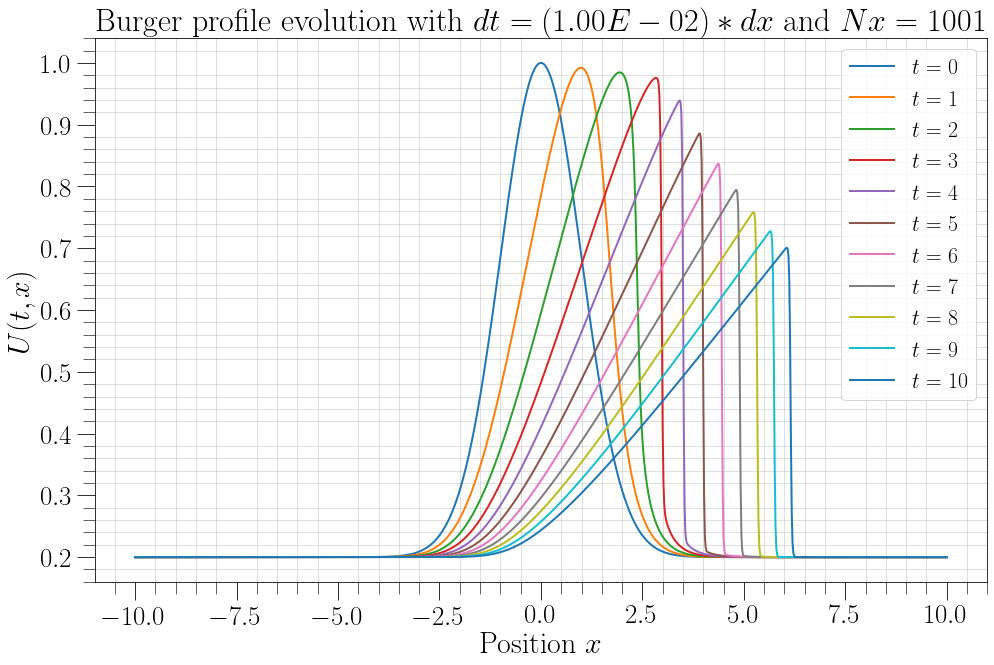

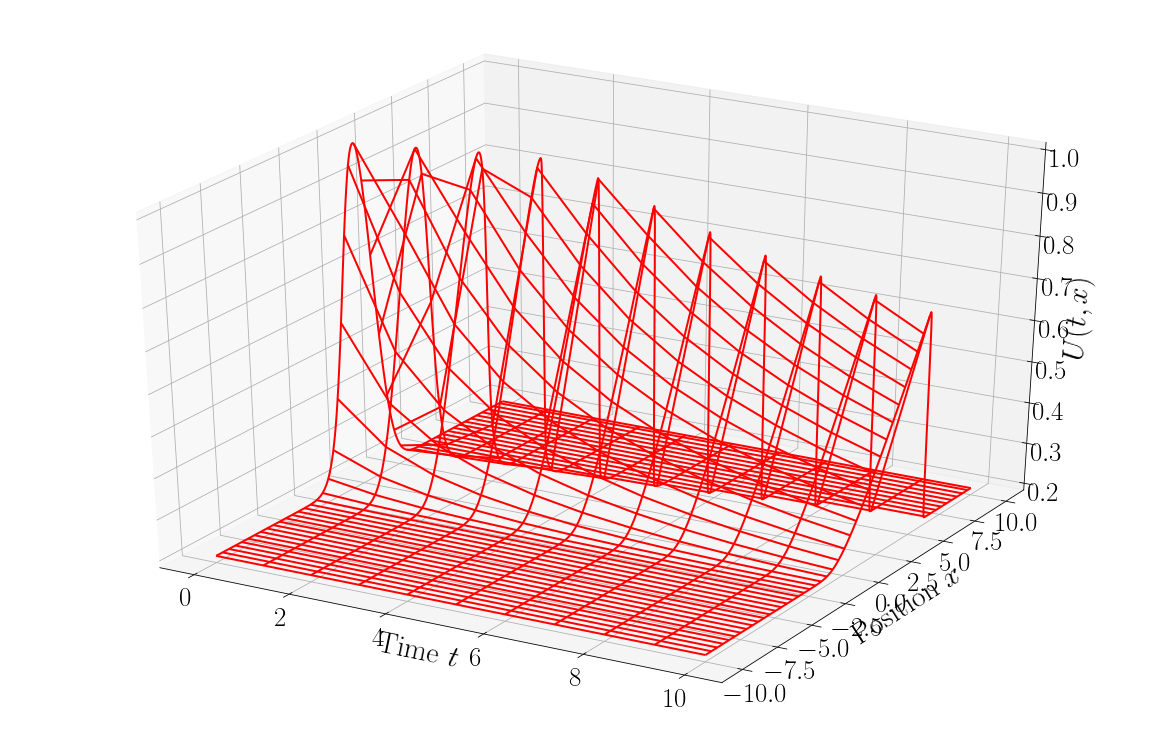

In [41]:
Burger(0.01,1001)

t =  1.999998
t =  3.999996
t =  5.999994
t =  7.999992
t =  9.99999
t =  11.999988
Done.


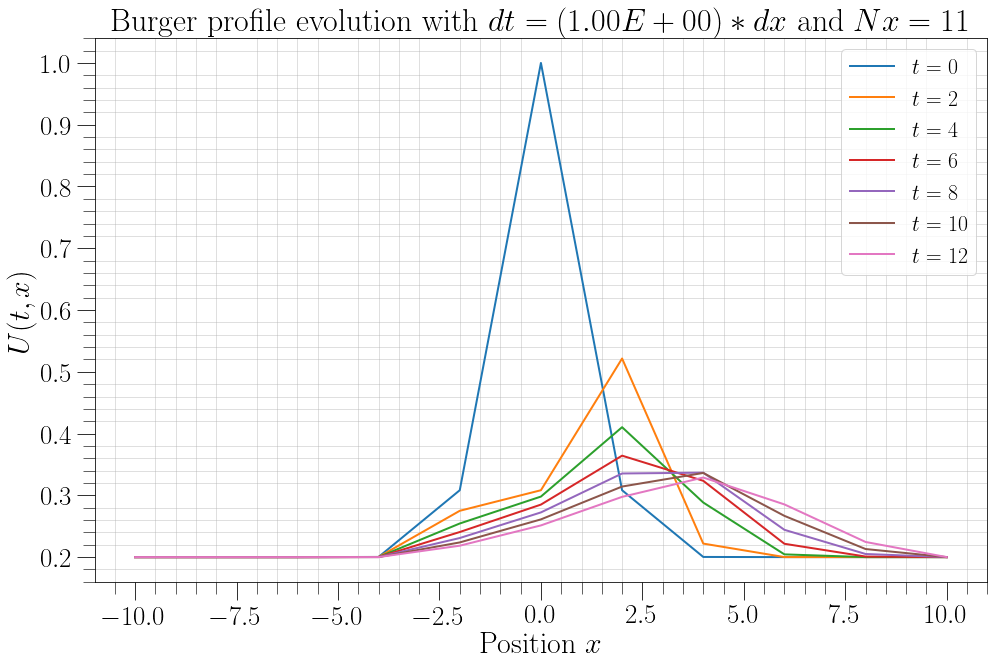

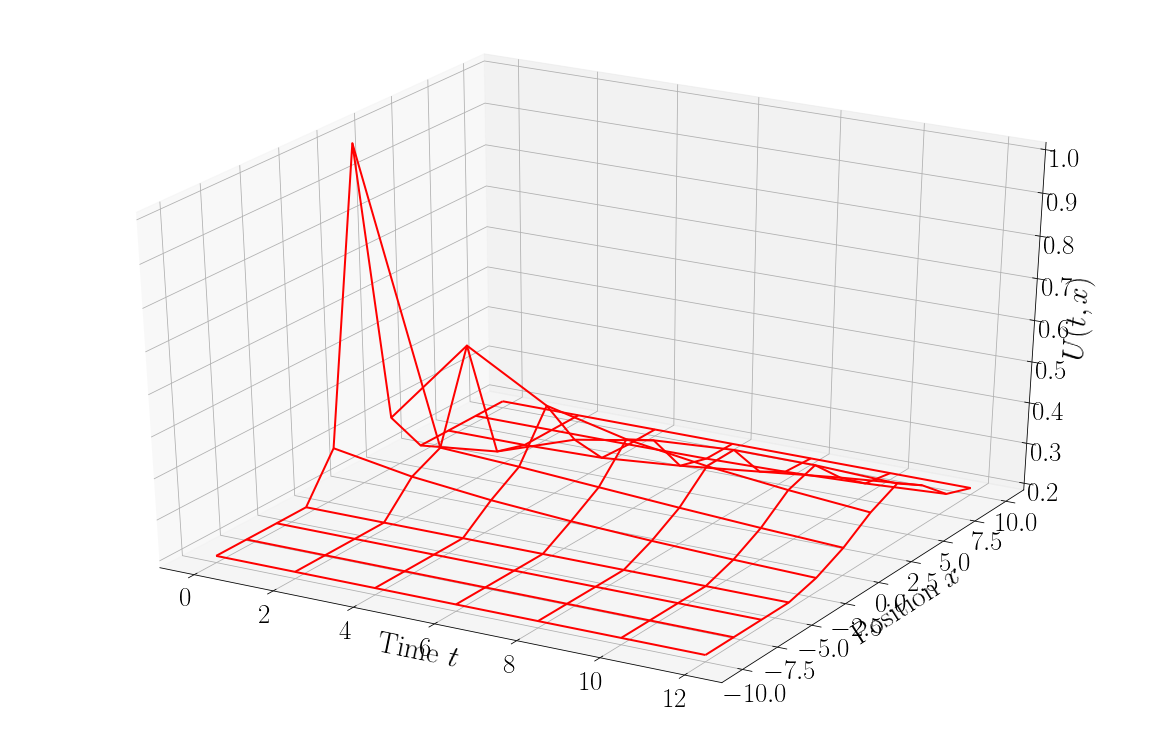

In [42]:
Burger(0.999999,11)

# Part 3 - Non-symmetric profile explanation

Instead of a constant velocity used in class, the Velocity now depends on the solution of $U$.

Since $U$ is not constant through $x$, the velocity now has a local value.

The local velocity is larger for a greater value of $U$, so the peak moves faster than the bottom.

Therefore, with a non-constant velocity along $x$, the original Gaussian shape can't be kept and eventually we will end up with a discontinuity and a triangular wave moving to the right.